# Clasificación de correos - Logistic Regression

### Estudiante: Rebeca Justiniano Saravia

Dataset con características básicas (número de enlaces, porcentaje de mayúsculas, presencia de palabras clave)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
data = pd.read_csv('datasets/dataset_spam.csv')
data.head()

,num_enlaces,mayusculas_pct,palabras_spam,es_spam
0,1,5,0,0
1,5,40,5,1
2,0,2,0,0
3,7,60,8,1
4,3,30,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   num_enlaces     8 non-null      int64
 1   mayusculas_pct  8 non-null      int64
 2   palabras_spam   8 non-null      int64
 3   es_spam         8 non-null      int64
dtypes: int64(4)
memory usage: 388.0 bytes


In [5]:
X = data[['num_enlaces','mayusculas_pct','palabras_spam']]
y = data['es_spam']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Preprocesar el texto (tokenización simple)

La tokenización simple no aplica en este dataset, ya que los correos ya fueron transformados a características numéricas (número de enlaces, porcentaje de mayúsculas, cantidad de palabras spam). Por lo tanto, no es necesario dividir texto en tokens.

## 2. Entrenar la regresión logística

In [7]:
# Initialize the model

model = LogisticRegression(max_iter=50)

# Train the model

model.fit(X_train, y_train)

# make predictions

y_pred = model.predict(X_test)

## 3. Generar matriz de confución

In [8]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[1, 0],
       [0, 1]])

In [9]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()



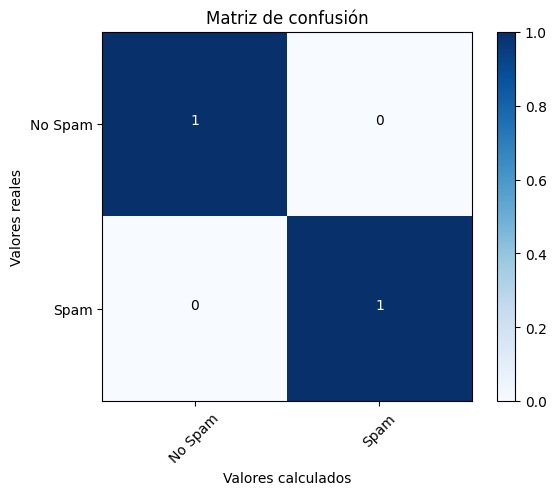

In [10]:
plot_cm(conf, classes=['No Spam', 'Spam'])

## 4. Calcular presición, recall y F1

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report with zero_division parameter

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## 5. Interpretar los pesos de cada característica

In [12]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
})

print(coeficientes)

         Variable  Coeficiente
0     num_enlaces     0.057141
1  mayusculas_pct     0.395790
2   palabras_spam     0.068478


Se puede observar que el numero de enlaces, las mayusculas y las palablras spam si afectan a que el modelo intercepte los correos como spam, aunque el valor para las 3 columnas es muy bajo, lo que mas influiría en la prediccion sería el porcentaje de mayusculas.